## Content
- Overview of Cars24 Data
  - Loading the data
  - Target Variable Encoding and Scaling revised
- Data Notation
  - Supervised learning revision
  - Data Notation
- Goal of ML: Generalization
  - Training, testing split

- Linear Regression Intuition
  - Univariate
  - Multivariate

- Implementation using Sklearn


- Evaluation metric
  - MSE and MAE
  - R2 Score



## Overview of Cars24 Data

<img src='https://drive.google.com/uc?id=11GZXTrohYa8ax9NkbT8EyJued13a0xyS' width=800>




<img src='https://drive.google.com/uc?id=1lJiiRZlkPgb83pwgL7OVp1MsSIs4hNZj' width=800>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 41.5MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0




<img src='https://drive.google.com/uc?id=1eFMBxWbNmAivUBc6VXoi1aHQPtC3k_GD' width=800>



### Target variable encoding

In [ ]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)



<img src='https://drive.google.com/uc?id=1JhK5pssMoxwIP2MFmtFJCp9SquJs2AeK' width=800>





<img src='https://drive.google.com/uc?id=1Di8s8QsWUZkEOFb3ceoTtBefJfmrSo3w' width=800>


For our data,
- we will be using **mean** to encode the columns.

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Scaling the data -

Notice one more thing:

- `km_driven` is in the ranges of 10000s,
- while `age` is in the range of 10s.





<img src='https://drive.google.com/uc?id=1816RrFmFMXAYHe4bBtXljxKq2pXTOa16' width=800>






<img src='https://drive.google.com/uc?id=1X_DZeiRvvjMiZfjX5Mx1A7PrviB-n9wR' width=800>


**Tip:** </br>
Apart from MinMaxScaler, you can also try out various methods to see which works the best.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Data Notation

Let's look at few notations we will be following throughout machine learning.





<img src='https://drive.google.com/uc?id=1KkkH1887zYJDd_La8GsQCfFgFXfOqp3E' width=800>


## Goal of ML: Generalization

<img src='https://drive.google.com/uc?id=176m5_ZP32kzwNNtWE5Ndl-7ykxt57eSC' width=800>


<img src='https://drive.google.com/uc?id=1fSCRGI-uvl2D5UaFyWdRt0fLaq7EUby9' width=800>





<img src='https://drive.google.com/uc?id=1J7SlbzRXDHH4O7zQ1FhNZhdWv36osntL' width=800>


<img src='https://drive.google.com/uc?id=1xcQQHhP8BborJTjdYcKYZdH3sDLXyHPF' width=800>

Now let's see how we can split our data.

We will be using sklearn's `test_train_split` function for this.

In [ ]:
from sklearn.model_selection import train_test_split

From our data:
- The output data, `y` is the column `selling_price`
- Remaining columns are the input data, `X`

In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

So we have to,
- predict 1 output feature
- using 17 input features.


Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [ ]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

We will use
- `X_train` and `y_train` to train our model,
- and `X_test` and `y_test` to evaluate the model's performance.

## Linear Regression Intuition

### Univariate


<img src='https://drive.google.com/uc?id=1i0_y1y4htkfSFPxin-Pv7s5zDPQkohgI' width=800>


<img src='https://drive.google.com/uc?id=1h5TQTygmLkn1U4HT0UDJ2xCiTa1R6X4Z' width=800>


<img src='https://drive.google.com/uc?id=1sZmDwv58o9TZ-4APuOSowEYESqj2hpbk' width=800>



<img src='https://drive.google.com/uc?id=1oXW05pUUG29M67EhpROay4IatlWtMjp_' width=800>


### Multivariate



<img src='https://drive.google.com/uc?id=1_qT0OawmozWToy3GzjYlOcNxGdd75eVU' width=800>



<img src='https://drive.google.com/uc?id=1oOgS0IKvYl9lF-cXdby7hsoBxh16eHji' width=800>


<img src='https://drive.google.com/uc?id=1rnU5hehIy0aBo9TXgbsCJNJ9245Jqjpj' width=800>


<img src='https://drive.google.com/uc?id=1gHUnuY6AMb2MdVqDCqZme9nMQdMQlOAM' width=800>


## Lin Reg using sklearn






### Univariate

Let's first take a single variable and train our model.

In [ ]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.9967642])

In [ ]:
model.intercept_

0.0015237505846132926

In [ ]:
y_hat = model.predict(X1)

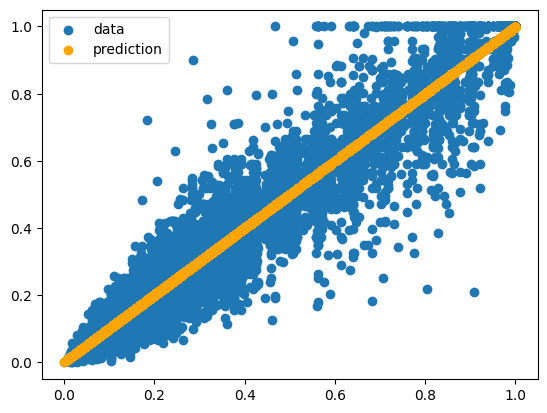

In [ ]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Notice,
- how the predicted values form a line similar to a regression line.

### Multivariate

Let's now generalize our model for the whole data.

In [ ]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 7.23382199e+11, -2.50488281e-01, -2.32558310e-01,  7.39953774e-02,
        4.68742062e-02,  7.23382199e+11,  6.61604471e-02,  8.58973267e-01,
       -7.18488746e-03, -7.03116019e-03,  6.98577387e-03,  1.32957359e-01,
        1.50077817e-02, -6.83704171e-03, -3.69616522e-03, -1.62563011e-02,
       -2.35725832e-02])

In [ ]:
model.intercept_

-723382198910.7482

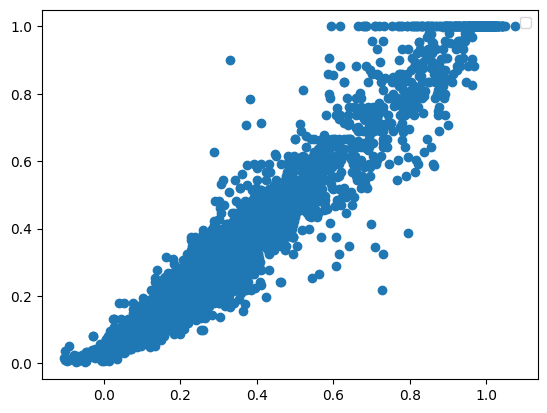

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

## Evaluation Metric


<img src='https://drive.google.com/uc?id=1Kedz1sZmqg6W6zpaLDP3TlqBOGpZzE3M' width=800>



<img src='https://drive.google.com/uc?id=1j-5gRhP53HHgsa75KPKE6fVOaluCr_1D' width=800>



<img src='https://drive.google.com/uc?id=1LmtrH5nVlqk_ZCNN_MsQhC1igtvgKnbO' width=800>


<img src='https://drive.google.com/uc?id=1IAIlSmmRMGVobD3F0S-aWQvK0OUIjQUr' width=800>




<img src='https://drive.google.com/uc?id=15AUqm2RtPKoCqT-luL0dCo3MCGCbDCLG' width=800>




<img src='https://drive.google.com/uc?id=1FPQ4JMtOuloHH-pOkhrp8Zj_ISEQGZVI' width=800>

<img src='https://drive.google.com/uc?id=12wwCXE2bZTS1JWmyK1kbxYssok38w0R1' width=800>

**Note:** </br>
We will be using the above functions later to understand how Linear Regression works under the hood, </br> and the optimization behind it.

#### What is R2 Score, or the coefficient of determination?



<img src='https://drive.google.com/uc?id=1Eov4qWaDvsH8c94dux8N_BRtTpUttSS-' width=800>




<img src='https://drive.google.com/uc?id=1zNLjxfIjxp9dymK5B4uPOceRqIbCgBFG' width=800>


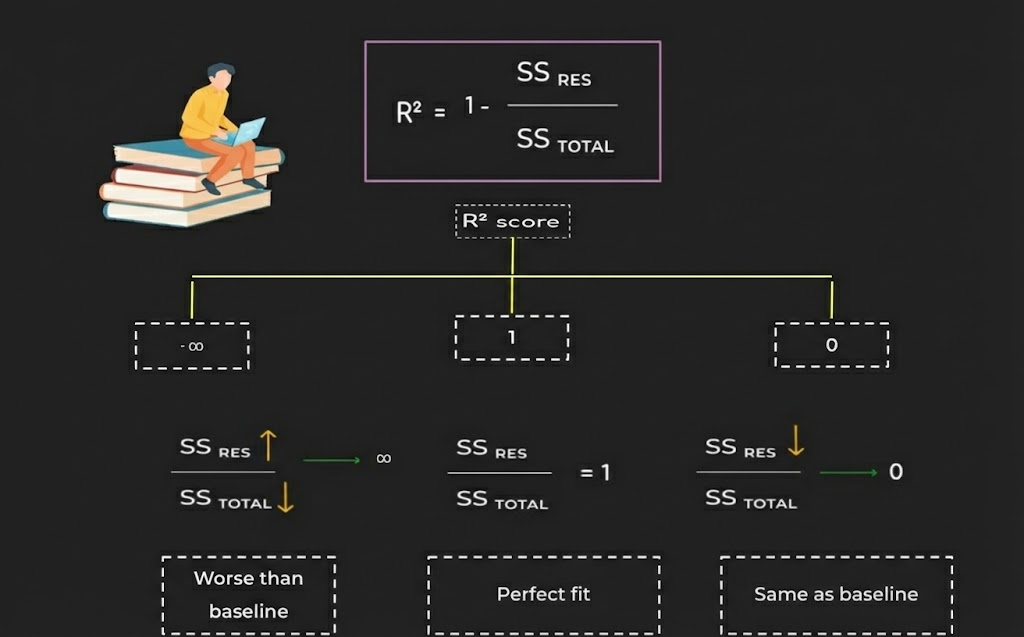



<img src='https://drive.google.com/uc?id=1tODwK1Y_iFVNA9ml14KXSwSGFQsc6BMw' width=800>


#### Let's check the performance of our previously trained model on test data.

\
LinearRegression's default `.score()` function uses R2 score to evaluate the data.

In [ ]:
model.score(X_train, y_train)

0.9459004943250285

In [ ]:
model.score(X_test, y_test)

0.945987722055055